In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import auth
auth.authenticate_user()

In [9]:
unemployment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unemployment.csv')
unemployment.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
0,2024-03,0.06,0.06,0.06,37.17,"1,199,424,535.47","568,063,465.48","4,354","5,385",NaN,0.05
1,2022-08,0.06,0.06,0.06,35.51,"2,806,818,863.98","1,211,523,912.51","9,546","11,186",26.84,0.07
2,2022-09,0.06,0.06,0.06,35.54,"3,093,935,845.24","1,464,589,773.02","10,938","12,865",30.32,0.07
3,2022-10,0.06,0.06,0.05,35.64,"3,427,435,541.85","1,546,904,050.13","12,365","14,553",33.87,0.07
4,2022-11,0.06,0.06,0.05,35.75,"3,725,734,013.69","1,628,045,619.91","13,866","16,226",37.43,0.07


In [22]:
unemployment.isna().sum()

Date                                                          0
Calgary CER Unemployment rate (%)                             0
Alberta Unemployment Rate (%)                                 0
Canada Unemployment rate (%)                                  0
Calgary (CMA) Average Hourly Wage Rate ($)                    0
City of Calgary Building Permits Residential Value ($)        0
City of Calgary Building Permits Non-Residential Value ($)    0
Calgary (City) Total Housing Starts (units)                   0
Calgary (CMA) Total Housing Starts (units)                    0
Calgary (CER) Retail Sales ($billions)                        2
Calgary (CMA) Inflation Rate (%change)                        0
dtype: int64

In [23]:
unemployment = unemployment.fillna(0)

In [24]:
unemployment.columns

Index(['Date', 'Calgary CER Unemployment rate (%)',
       'Alberta Unemployment Rate (%)', 'Canada Unemployment rate (%)',
       'Calgary (CMA) Average Hourly Wage Rate ($)',
       'City of Calgary Building Permits Residential Value ($)',
       'City of Calgary Building Permits Non-Residential Value ($)',
       'Calgary (City) Total Housing Starts (units)',
       'Calgary (CMA) Total Housing Starts (units)',
       'Calgary (CER) Retail Sales ($billions)',
       'Calgary (CMA) Inflation Rate (%change)'],
      dtype='object')

In [ ]:
#  Calgary CER Unemployment rate, Alberta Unemployment Rate and Canada Unemployment rate the analysis are together
#  City of calgary Building Permits Residential Value and City of Calgary Building Permits Non-Residential Value the anysis are together
#  Calgary/CMA) Average Hourly Wage Rate($) and Calgary(City) Total Housing Starts(units) the analysis are together

In [25]:
Unemployment_rate = unemployment[["Date","Calgary CER Unemployment rate (%)", "Alberta Unemployment Rate (%)", 'Canada Unemployment rate (%)']]
Unemployment_rate.head()

,Date,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%)
0,2024-03,0.06,0.06,0.06
1,2022-08,0.06,0.06,0.06
2,2022-09,0.06,0.06,0.06
3,2022-10,0.06,0.06,0.05
4,2022-11,0.06,0.06,0.05


In [48]:
Unemployment_rate.mean()

Calgary CER Unemployment rate (%)    0.080588
Alberta Unemployment Rate (%)        0.078824
Canada Unemployment rate (%)         0.068431
dtype: float64

In [52]:
from scipy.stats import zscore
Unemployment_rate['Calgary_z'] = zscore(Unemployment_rate['Calgary CER Unemployment rate (%)'])
Unemployment_rate['Alberta_z'] = zscore(Unemployment_rate['Alberta Unemployment Rate (%)'])
Unemployment_rate['Canada_z'] = zscore(Unemployment_rate['Canada Unemployment rate (%)'])

data_clean = Unemployment_rate[(Unemployment_rate['Calgary_z'].abs() < 3) &
                  (Unemployment_rate['Alberta_z'].abs() < 3) &
                  (Unemployment_rate['Canada_z'].abs() < 3)]

<ipython-input-52-9b6c575efcfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate['Calgary_z'] = zscore(Unemployment_rate['Calgary CER Unemployment rate (%)'])
<ipython-input-52-9b6c575efcfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate['Alberta_z'] = zscore(Unemployment_rate['Alberta Unemployment Rate (%)'])
<ipython-input-52-9b6c575efcfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [53]:
data_clean

,Calgary CER Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary_z,Alberta_z,Canada_z
date,,,,,,
2024-03-01,0.06,0.06,0.06,-1.053376,-0.947481,-0.487192
2022-08-01,0.06,0.06,0.06,-1.053376,-0.947481,-0.487192
2022-09-01,0.06,0.06,0.06,-1.053376,-0.947481,-0.487192
2022-10-01,0.06,0.06,0.05,-1.053376,-0.947481,-1.065023
2022-11-01,0.06,0.06,0.05,-1.053376,-0.947481,-1.065023
2022-12-01,0.06,0.06,0.05,-1.053376,-0.947481,-1.065023
2023-01-01,0.06,0.06,0.05,-1.053376,-0.947481,-1.065023
2023-02-01,0.07,0.06,0.05,-0.541736,-0.947481,-1.065023
2023-03-01,0.07,0.06,0.05,-0.541736,-0.947481,-1.065023


In [62]:
data_clean.columns

Index(['Calgary CER Unemployment rate (%)', 'Alberta Unemployment Rate (%)',
       'Canada Unemployment rate (%)', 'Calgary_z', 'Alberta_z', 'Canada_z'],
      dtype='object')

In [64]:
from scipy.signal import butter, filtfilt

def filter(Unemployment_rate, cutoff, fs, order=5):
  nyq = 0.5 * fs
  normal_cutoff = cutoff/nyq
  b,a = butter(order, normal_cutoff, btype='low', analog = False)
  y = filtfilt(b,a,Unemployment_rate)
  return y


In [65]:
Unemployment_rate['Calgary_filter'] = filter(Unemployment_rate['Calgary CER Unemployment rate (%)'],cutoff=0.1, fs=1)
Unemployment_rate['Alberta_filter'] = filter(Unemployment_rate['Alberta Unemployment Rate (%)'],cutoff=0.1,fs=1)
Unemployment_rate['Canada_filter'] = filter(Unemployment_rate['Canada Unemployment rate (%)'],cutoff=0.1,fs=1)

<ipython-input-65-31aff4c6a405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate['Calgary_filter'] = filter(Unemployment_rate['Calgary CER Unemployment rate (%)'],cutoff=0.1, fs=1)
<ipython-input-65-31aff4c6a405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate['Alberta_filter'] = filter(Unemployment_rate['Alberta Unemployment Rate (%)'],cutoff=0.1,fs=1)
<ipython-input-65-31aff4c6a405>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [69]:
Unemployment_rate['Calgary_ExpSmoothed'] = Unemployment_rate['Calgary CER Unemployment rate (%)'].ewm(span=3, adjust=False).mean()
Unemployment_rate['Alberta_ExpSmoothed'] = Unemployment_rate['Alberta Unemployment Rate (%)'].ewm(span=3, adjust=False).mean()
Unemployment_rate['Canada_ExpSmoothed'] = Unemployment_rate['Canada Unemployment rate (%)'].ewm(span=3, adjust=False).mean()

<ipython-input-69-61c329acda44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Unemployment_rate['Calgary_ExpSmoothed'] = Unemployment_rate['Calgary CER Unemployment rate (%)'].ewm(span=3, adjust=False).mean()


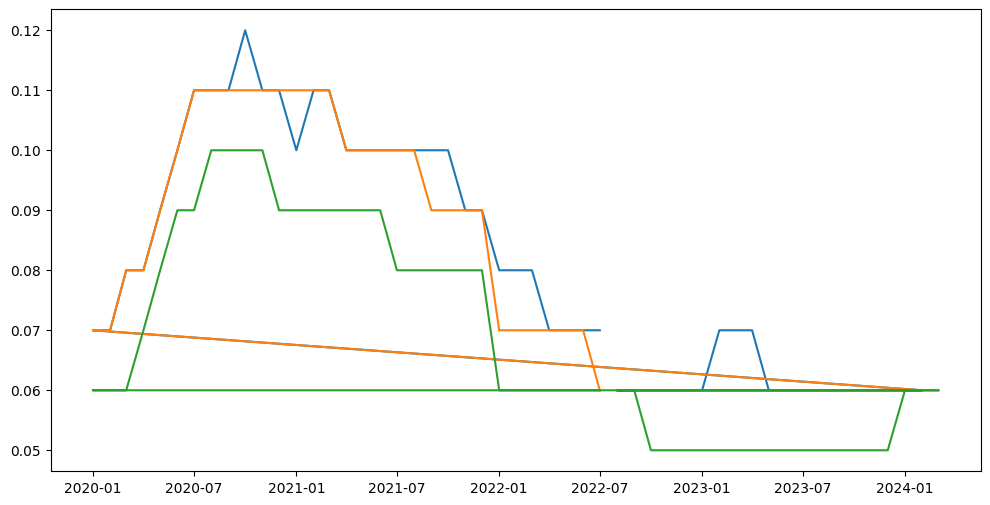

In [66]:
plt.figure(figsize=(12,6))
plt.plot(Unemployment_rate.index, Unemployment_rate['Calgary CER Unemployment rate (%)'], label="Calgary_original")
plt.plot(Unemployment_rate.index, Unemployment_rate['Alberta Unemployment Rate (%)'],label='Alberta_original')
plt.plot(Unemployment_rate.index, Unemployment_rate['Canada Unemployment rate (%)'],label='Canada_original')

In [73]:
Unemployment_rate['Calgary_Smoothed'] = Unemployment_rate['Calgary CER Unemployment rate (%)'].rolling(window=3).mean()
Unemployment_rate['Alberta_Smoothed'] = Unemployment_rate['Alberta Unemployment Rate (%)'].rolling(window=3).mean()
Unemployment_rate['Canada_Smoothed'] = Unemployment_rate['Canada Unemployment rate (%)'].rolling(window=3).mean()

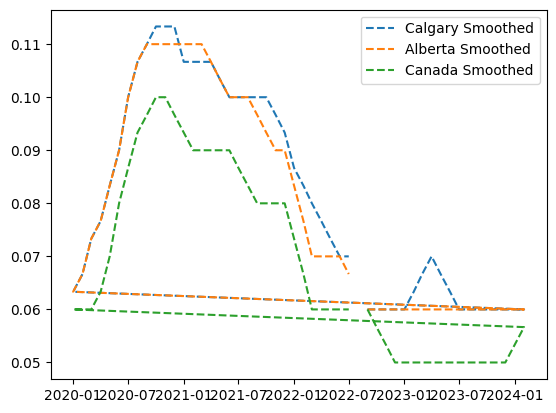

In [75]:
plt.plot(Unemployment_rate.index, Unemployment_rate['Calgary_Smoothed'], label='Calgary Smoothed', linestyle='--')
plt.plot(Unemployment_rate.index, Unemployment_rate['Alberta_Smoothed'], label='Alberta Smoothed', linestyle='--')
plt.plot(Unemployment_rate.index, Unemployment_rate['Canada_Smoothed'], label='Canada Smoothed', linestyle='--')
plt.legend()


**CALGARY ANALYSIS**

In the case of Calgary, it is possible visualize a sharp fluctuation during peak periods. The smoothed line of Calgary shows a clear upward trend starting in early 2020,peaking around mid-2020, and then go down granually. This indicates a significant impact of pandemic on Calgary's employment, with a slow recovery phase.

**ALBERTA ANALYSIS**

In the case of Alberta the situation is similiar as Carlary due to the unemployment rate shows fluctuation. The smoothed line follows a similar pattern to Calgary, with an upward trend peaking in mid-2020 and a gradual decline afterward.This reflects the broader economic impact on the province, with a slow but steady recovery.

**CANADA ANALYSIS**

The original line for Canada show less fluctuation compared to Calgary and Alberta. The smoothed line for Canada shows a more moderate peak and a smoother decline, indicating a more stable national recovery. This suggest that national economy have been more resilient compared to Alberta and Calgary.